In [58]:
import pandas as pd
import numpy as np

# Load the dataset
dataset = pd.read_csv("data.csv")  # Replace with the actual path to your dataset file

# Handle missing values if any
dataset = dataset.dropna()

# Normalize numerical features (if required)
numerical_features = ['current_lap_time', 'SPEED', 'STEER', 'THROTTLE', 'BRAKE']  # Adjust the feature list based on your dataset
dataset[numerical_features] = (dataset[numerical_features] - dataset[numerical_features].mean()) / dataset[numerical_features].std()

# Encode categorical variables (if any)

# Feature Engineering
# Create a new column representing braking events occurring 3 seconds in advance
brake_threshold = 3.0  # Adjust the threshold as per your requirements

dataset['target'] = np.where(dataset['BRAKE'].shift(-int(brake_threshold * 100)) > 0, 1, 0)

# Drop unnecessary columns
feature_columns = ['current_lap_time', 'SPEED', 'STEER', 'THROTTLE','BRAKE']  # Adjust the feature list based on your dataset
dataset = dataset[feature_columns + ['target']]

# Split the dataset into training and testing sets
train_ratio = 0.8  # Adjust the ratio as per your requirements
train_size = int(len(dataset) * train_ratio)
train_data = dataset[:train_size]
test_data = dataset[train_size:]

# Separate features and target variables
X_train = train_data[feature_columns]
y_train = train_data['target']
X_test = test_data[feature_columns]
y_test = test_data['target']


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Predict on the testing set
y_test_pred = model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9171779141104295
Testing Accuracy: 1.0


In [60]:
import csv

predictions = []

with open('data.csv', 'r') as file:
    csv_reader = csv.DictReader(file)
    
    for row in csv_reader:
        data_point = {
            'current_lap_time': float(row['current_lap_time']),
            'SPEED': float(row['SPEED']),
            'STEER': float(row['STEER']),
            'THROTTLE': float(row['THROTTLE']),
            'BRAKE':float(row['BRAKE']),
        }
        
        # Preprocess the data point (similar to the previous example)
        for feature in numerical_features:
            data_point[feature] = (data_point[feature] - dataset[feature].mean()) / dataset[feature].std()
        
        # Create a DataFrame from the preprocessed data point
        data_point_df = pd.DataFrame([data_point], columns=feature_columns)
        
        # Make a prediction for the data point
        prediction = model.predict(data_point_df)
        
        # Append the prediction to the list
        predictions.append(prediction[0])

# Output the predictions with current lap time
with open('data.csv', 'r') as file:
    csv_reader = csv.DictReader(file)
    
    for lap_time, prediction in zip(csv_reader, predictions):
        if prediction == 1:
            print("Lap time {}: Braking event predicted!".format(lap_time['current_lap_time']))
        else:
            print("Lap time {}: No braking event predicted.".format(lap_time['current_lap_time']))


Lap time 83750: No braking event predicted.
Lap time 83843: No braking event predicted.
Lap time 83963: No braking event predicted.
Lap time 84057: No braking event predicted.
Lap time 84163: No braking event predicted.
Lap time 84270: No braking event predicted.
Lap time 84377: No braking event predicted.
Lap time 26: Braking event predicted!
Lap time 120: Braking event predicted!
Lap time 226: Braking event predicted!
Lap time 333: Braking event predicted!
Lap time 439: Braking event predicted!
Lap time 533: Braking event predicted!
Lap time 639: Braking event predicted!
Lap time 733: Braking event predicted!
Lap time 839: Braking event predicted!
Lap time 933: Braking event predicted!
Lap time 1039: No braking event predicted.
Lap time 1146: No braking event predicted.
Lap time 1239: No braking event predicted.
Lap time 1346: No braking event predicted.
Lap time 1453: No braking event predicted.
Lap time 1559: No braking event predicted.
Lap time 1666: No braking event predicted.
La

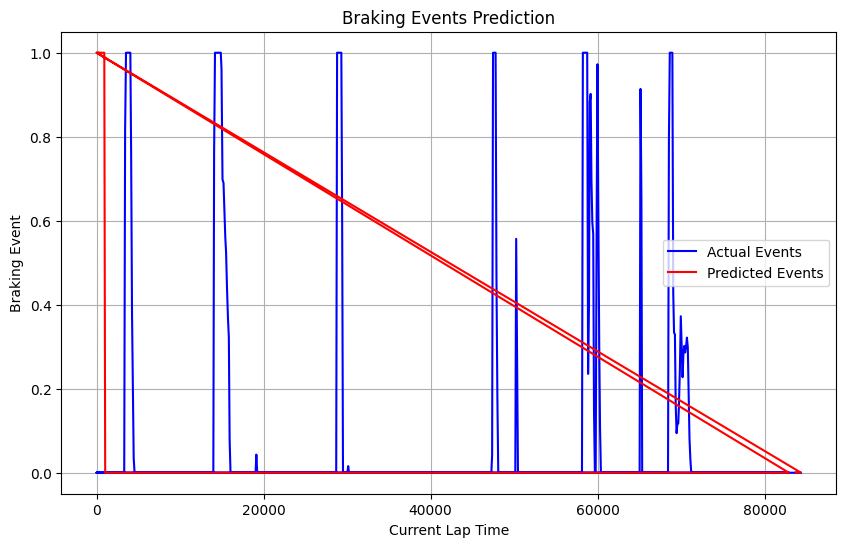

In [61]:
import csv
import matplotlib.pyplot as plt

actual_events = []  # List to store actual events (braking or non-braking)
predictions = []  # List to store predicted events (braking or non-braking)

with open('data.csv', 'r') as file:
    csv_reader = csv.DictReader(file)

    for row in csv_reader:
        data_point = {
            'current_lap_time': float(row['current_lap_time']),
            'SPEED': float(row['SPEED']),
            'STEER': float(row['STEER']),
            'THROTTLE': float(row['THROTTLE']),
            'BRAKE': float(row['BRAKE'])
        }

        # Preprocess the data point (similar to the previous example)
        for feature in numerical_features:
            data_point[feature] = (data_point[feature] - dataset[feature].mean()) / dataset[feature].std()

        # Create a DataFrame from the preprocessed data point
        data_point_df = pd.DataFrame([data_point], columns=feature_columns)

        # Make a prediction for the data point
        prediction = model.predict(data_point_df)

        # Append the prediction to the list
        predictions.append(prediction[0])

        # Add actual event to the list
        actual_events.append(float(row['BRAKE']))

# Plotting the events along the lap
lap_times = []
braking_events = []

with open('data.csv', 'r') as file:
    csv_reader = csv.DictReader(file)

    for row in csv_reader:
        lap_times.append(float(row['current_lap_time']))
        braking_events.append(float(row['BRAKE']))

plt.figure(figsize=(10, 6))
plt.plot(lap_times, braking_events, color='blue', label='Actual Events')
plt.plot(lap_times, predictions, color='red', label='Predicted Events')
plt.xlabel('Current Lap Time')
plt.ylabel('Braking Event')
plt.title('Braking Events Prediction')
plt.legend()
plt.grid(True)
plt.show()
